In [1]:
# magic for real time editing of .py files
%load_ext autoreload
%autoreload 2

In [54]:
# Custom functions and tools 
import sys
sys.path.insert(1, '../../dipper')

import tools as my_tools
import dipper as dip_pipeline
import models as dip_models
from evaluate import evaluate as evaluate
import gpmcmc as gp_my_data

import numpy as np
import matplotlib.pyplot as plt
import astropy.stats as astro_stats
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')

In [45]:
time = np.linspace(-100, 100, 250) + np.random.normal(2, 140, 250)
time = time[np.argsort(time)]
model = dip_models.skew_norm(time, -155, 5, 0, 16, 0.45) + np.random.normal(0, 0.008, len(time)) + dip_models.skew_norm(time, 25, 5, 0, 0, 0.2)
model_err = abs(np.random.normal(0.001, 0.002, 250))


(16.197810016264196, 15.964856166688822)

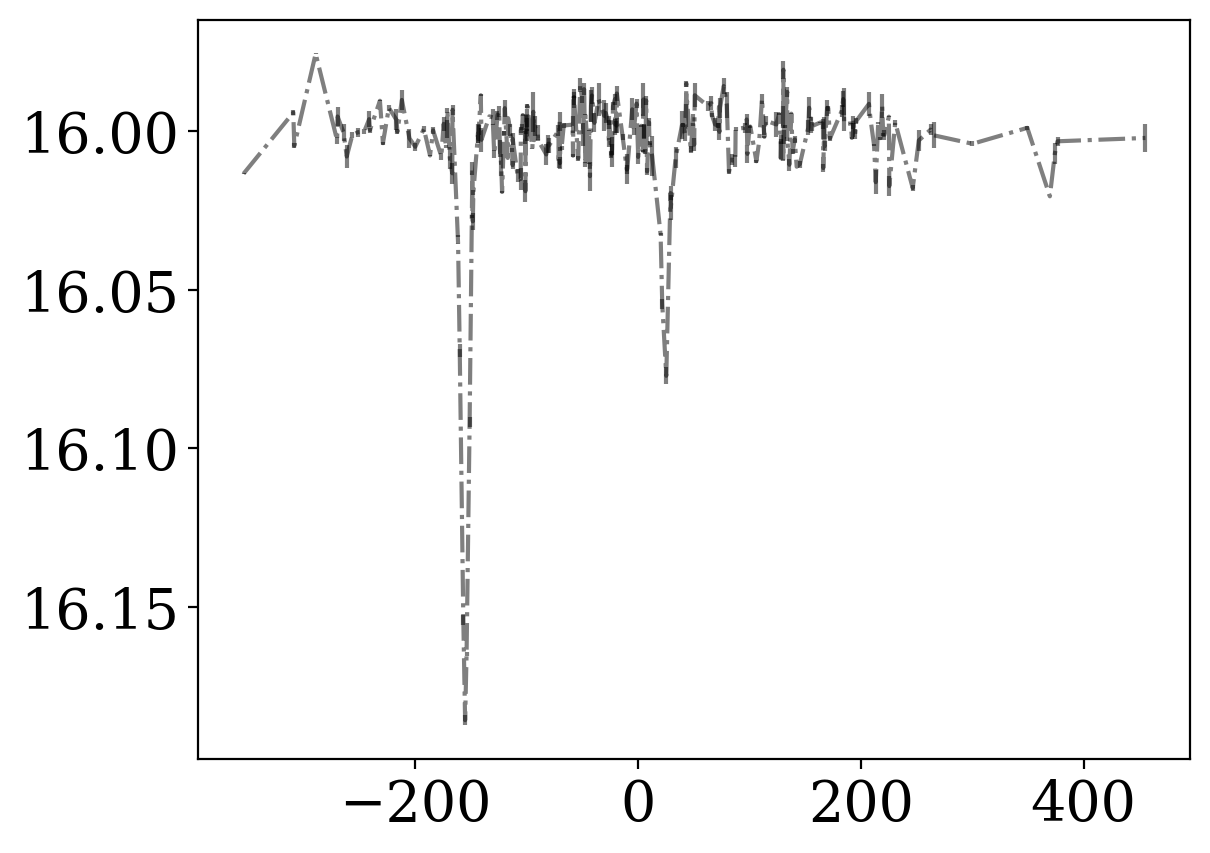

In [53]:
plt.errorbar(time, model, model_err, fmt='-.', color='k', alpha=0.5)
plt.ylim(plt.ylim()[::-1])

In [55]:
R, S = astro_stats.biweight.biweight_location(model), astro_stats.biweight.biweight_scale(model)

In [57]:
dev = dip_pipeline.deviation(model, model_err, R, S)

In [ ]:
dip_pipeline.peak_detector()